In [1]:
import numpy as np
from pandas import DataFrame as df

In [15]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
from tensorflow.keras.utils import image_dataset_from_directory

validation_ds = image_dataset_from_directory(
    '../robot_or_brain_binary_combined_data/images_by_class/validation',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=0,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 750 files belonging to 2 classes.


In [3]:
X, y = next(iter(validation_ds))

X.shape

TensorShape([32, 224, 224, 3])

In [4]:
df(X[0, :, :, :].numpy().reshape(-1, 3)).describe()

,0,1,2
count,50176.000000,50176.000000,50176.000000
mean,63.647949,54.977913,42.107914
std,63.949020,50.673347,40.601227
min,0.000000,0.000000,0.000000
25%,14.140599,13.000000,9.532499
50%,34.840843,35.000000,32.000000
75%,104.818489,96.357271,62.421906
max,253.734665,241.812469,255.000000


In [5]:
from matplotlib import pyplot as plt
% matplotlib inline

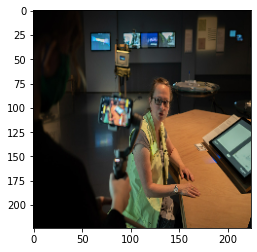

In [19]:
x0 = X[0, :, :, :]
plt.imshow(x0 / 256)

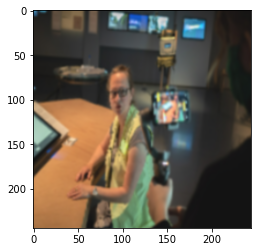

In [306]:
input_resolution = 244
augment = tf.keras.Sequential([
    layers.RandomContrast(0.1, seed=None),
    layers.RandomBrightness(0.1, value_range=(0, 255)),
    layers.RandomFlip(mode='horizontal'),
    layers.RandomRotation(factor=.02),
    tf.keras.layers.RandomTranslation(
        0.02,
        0.02,
        fill_mode="reflect",
        interpolation="bilinear",
        seed=None,
        fill_value=0.0,

    ),

    layers.RandomZoom(
        (-0.2, 0),
        width_factor=None,
        fill_mode="reflect",
        interpolation="bilinear",
        seed=None,
        fill_value=0.0,
    ),
    layers.Resizing(input_resolution, input_resolution),
])

plt.imshow(augment(x0, training=True) / 256)

In [113]:
Xp = preprocess_input(X)
Xp.shape

TensorShape([32, 224, 224, 3])

In [10]:
df(Xp[0, :, :, :].numpy().reshape(-1, 3)).describe()

,0,1,2
count,50176.000000,50176.000000,50176.000000
mean,-0.500800,-0.568801,-0.669742
std,0.501561,0.397438,0.318441
min,-1.000000,-1.000000,-1.000000
25%,-0.889093,-0.898039,-0.925235
50%,-0.726738,-0.725490,-0.749020
75%,-0.177894,-0.244257,-0.510416
max,0.990076,0.896568,1.000000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


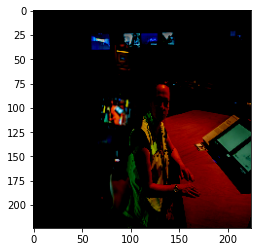

In [11]:
plt.imshow(Xp[0, :, :, :])

In [12]:
import tensorflow as tf

# model = tf.keras.models.load_model('./fine_tuned_model_1fcck739')
loaded_model = tf.keras.models.load_model('./fine_tuned_model_3f0vzk68')

In [13]:

inputs = tf.keras.Input(shape=(None, None, 3))
x = preprocess_input(inputs)
outputs = loaded_model(x)
model = tf.keras.Model(inputs, outputs)


In [ ]:
# logits = model.predict(validation_ds.map(lambda X,y: preprocess_input(X), y))
class_list = validation_ds.class_names
logits = model.predict(validation_ds)
predicted = [class_list[v] for v in np.argmax(logits, 1)]
from pandas import DataFrame as df

print(df(predicted).value_counts())
print(df(trues).value_counts())